## Importing required modules

In [1]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,roc_auc_score

from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

In [2]:
insurance =pd.read_csv('balanced_insurance_dataset.csv')

In [7]:
insurance.head(10)

,Unnamed: 0,id,Driving_License,Previously_Insured,Vehicle_Damage,Age_Segment_20s,Age_Segment_30s,Age_Segment_40s,Age_Segment_50s,Age_Segment_60s,...,Policy_channel_type_others,Region_Andhra Pradesh,Region_Goa,Region_Haryana,Region_Maharashtra,Region_Others,Region_West Bengal,Gender_F,Gender_M,Response
0,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
1,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,3,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
3,3,4,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,5,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,5,6,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,6,7,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,7,8,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
8,8,9,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
9,9,10,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


The field unnamed 0 is unnecessary. to be dropped.

## Train test split for model training and testing

In [3]:
from sklearn.model_selection import train_test_split

X = insurance.drop(['Response', 'Unnamed: 0'], axis=1)
y = insurance['Response']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [4]:
print('shape of X_train:' , X_train.shape,  ',Shape of y_train:', y_train.shape, 'Shape of X_test:', X_test.shape, 'Shape of y_test:' ,y_test.shape)

shape of X_train: (467241, 42) ,Shape of y_train: (467241,) Shape of X_test: (200247, 42) Shape of y_test: (200247,)


# Model training

## Logistic Regression

In [5]:
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)

In [6]:
y_predicted =logreg_model.predict(X_test)

In [69]:
print('Logistic Regression Performance')
print('Accuracy: ' ,accuracy_score(logreg_model.predict(X_test),y_test))
print( 'Recall: ' ,recall_score(logreg_model.predict(X_test),y_test))
print('Precision: ' ,precision_score(logreg_model.predict(X_test),y_test))
print('f1 score: ' ,f1_score(logreg_model.predict(X_test),y_test))
print('roc_auc_score: ' ,roc_auc_score(logreg_model.predict(X_test),y_test))

Logistic Regression Performance
Accuracy:  0.8609517246200942
Recall:  0.8484620358842208
Precision:  0.8786343238083816
f1 score:  0.8632846256579464
roc_auc_score:  0.861402465435798


The model is giving an accuracy of 86% on the test set. Recall is ~85% and Precision is ~88%.
Since we are more concerned about not letting any potential leads out of hand and also optimize the resources, we can work on the roc_auc metric.

roc_curve:  (array([0.        , 0.12565711, 1.        ]), array([0.        , 0.84846204, 1.        ]), array([2, 1, 0], dtype=int64))


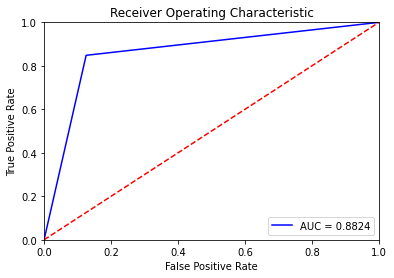

In [22]:
import matplotlib.pyplot as plt
print('roc_curve: ' ,roc_curve(logreg_model.predict(X_test),y_test))
fpr_logreg,tpr_logreg,threshold_logreg = roc_curve(logreg_model.predict(X_test),y_test)
roc_auc_logreg = auc(fpr_logreg,tpr_logreg)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
# Listing out a range of Regularization parameters Cs to fit the Logistic regression model
C =[0.01, 0.1, 1, 10, 100, 1000]

#Listing out all scoring metrices on gridsearchcv to find the metric for roc_auc
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [16]:
gridsearch_logreg= GridSearchCV(logreg, param_grid = {'C': C}, cv =5, scoring= 'roc_auc')

In [17]:
model_logreg = gridsearch_logreg.fit(X_train,y_train)

In [19]:
print(model_logreg.best_params_,model_logreg.best_score_)

{'C': 0.01} 0.7741558997158886


With regularization value of 0.01 we can get an roc_auc of 0.774 on the model.

Let's compare the logistic regression plot with the new plot of the optimized model.

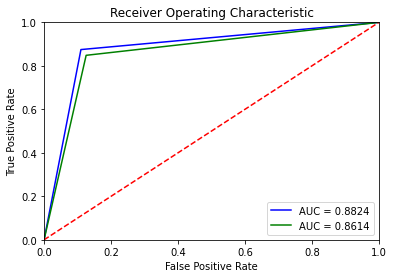

In [23]:
logreg =LogisticRegression(C=0.01)
best_logreg_model = logreg.fit(X_train, y_train)
fpr_logreg_best,tpr_logreg_best,threshold_logreg_best = roc_curve(best_logreg_model.predict(X_test),y_test)
roc_auc_logreg_best = auc(fpr_logreg_best,tpr_logreg_best)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg_best,tpr_logreg_best, 'b',label = 'AUC = %0.4f' % roc_auc_logreg_best)
plt.plot(fpr_logreg,tpr_logreg, 'g',label = 'AUC = %0.4f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree Classifier

In [24]:
DT =DecisionTreeClassifier()
DT_model = DT.fit(X_train , y_train)

In [25]:
print('Decision Trees- Entropy Model performance')
print('Recall: ' ,recall_score(DT_model.predict(X_test), y_test))
print('Accuracy: ' ,accuracy_score(DT_model.predict(X_test), y_test))
print('Precision: ',precision_score(DT_model.predict(X_test), y_test))
print('f1 score: ',f1_score(DT_model.predict(X_test), y_test))
print('roc_auc: ',roc_auc_score(DT_model.predict(X_test), y_test))

Decision Trees- Entropy Model performance
Recall:  0.8953929216538637
Accuracy:  0.8982506604343635
Precision:  0.9017020978881193
f1 score:  0.8985364347570601
roc_auc:  0.898268885919153


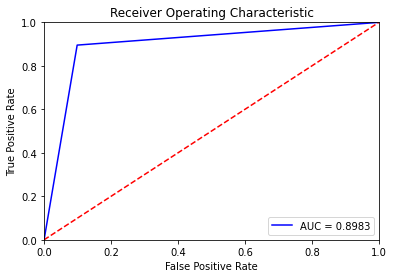

In [27]:
# calculate roc curves
fpr_entropy,tpr_entropy,threshold_entropy = roc_curve(DT_model.predict(X_test), y_test)
roc_auc_entropy = auc(fpr_entropy,tpr_entropy)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_entropy,tpr_entropy, 'b',label = 'AUC = %0.4f' % roc_auc_entropy)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [31]:
print(fpr, tpr, threshold)

[0.         0.09920103 1.        ] [0.         0.89578589 1.        ] [2 1 0]


In [32]:
confusion_matrix(DT_model.predict(X_test), y_test)

array([[89407,  9846],
       [10525, 90469]], dtype=int64)

Decision Tree model with default parameters is giving an AUC of 0.892 which is slightly better than the Logistic regression model.
However we haven't specified the tree depth and the number of leaf nodes which might have caused the problem of overfitting.
Let's check with the gini impurity model also.

In [28]:
DT_gini =DecisionTreeClassifier(criterion='gini')
DT_gini_model = DT_gini.fit(X_train , y_train)

In [29]:
print('Decision Trees- Gini Impurity Model performance')
print('Recall: ' ,recall_score(DT_gini_model.predict(X_test), y_test))
print('Accuracy: ' ,accuracy_score(DT_gini_model.predict(X_test), y_test))
print('Precision: ',precision_score(DT_gini_model.predict(X_test), y_test))
print('f1 score: ',f1_score(DT_gini_model.predict(X_test), y_test))
print('roc_auc: ',roc_auc_score(DT_gini_model.predict(X_test), y_test))

Decision Trees- Gini Impurity Model performance
Recall:  0.8953338361384566
Accuracy:  0.8982306851038967
Precision:  0.9017320819965419
f1 score:  0.8985215689594215
roc_auc:  0.8982494530766167


The gini impurity model performs in a similar fashion as the entropy model. Let's tune the hyperparameters and test the same.


In [30]:
depth = [3,5,10,15,20]

In [31]:
gscv =GridSearchCV(DT_gini, param_grid = {'max_depth': depth}, cv =5, scoring= 'roc_auc')

In [32]:
gini_model_cv = gscv.fit(X_train, y_train)

In [33]:
print(gini_model_cv.best_params_)
print(gini_model_cv.best_score_)

{'max_depth': 10}
0.972414940669931


It's interesting to note that we are getting the best score at a depth of 10. There is a possibility that the model is overfitting. Let's test the same.

In [34]:
best_gini_model = DecisionTreeClassifier(criterion = 'gini',max_depth =10)
best_gini_model_fitted = best_gini_model.fit(X_train,y_train)
print('Recall_Score: ' , recall_score(y_test,best_gini_model_fitted.predict(X_test) ))
print('Accuracy: ' ,accuracy_score(y_test,best_gini_model_fitted.predict(X_test)))
print('Precision: ',precision_score(y_test,best_gini_model_fitted.predict(X_test)))
print('f1 score: ',f1_score(y_test,best_gini_model_fitted.predict(X_test)))
print('roc_auc: ',roc_auc_score(y_test,best_gini_model_fitted.predict(X_test)))


Recall_Score:  0.8560363007605969
Accuracy:  0.9049523838059996
Precision:  0.9487250492921864
f1 score:  0.9000005254004865
roc_auc:  0.9049179647404398


The model is giving an amazing accuracy of ~90% with test set and the AUC is 0.9049. This seems to be a good model to work with.

Let's now test the entropy model.

In [38]:
gscv_entropy =GridSearchCV(DT_gini, param_grid = {'max_depth': depth}, cv =5, scoring= 'roc_auc')

In [39]:
entropy_model_cv = gscv_entropy.fit(X_train,y_train)

In [40]:
print(entropy_model_cv.best_params_)
print(entropy_model_cv.best_score_)

{'max_depth': 10}
0.9724046342762286


The entropy model is performing well on the training dataset.
Let's check the performance on test dataset with the same parameters.

In [44]:
entropy_model = DecisionTreeClassifier(criterion = 'entropy',max_depth =10)
entropy_model_fitted = entropy_model.fit(X_train, y_train)
print('Recall: ', recall_score(y_test,entropy_model_fitted.predict(X_test) ))
print('Accuracy: ' ,accuracy_score(y_test,entropy_model_fitted.predict(X_test)))
print('Precision: ',precision_score(y_test,entropy_model_fitted.predict(X_test)))
print('f1 score: ',f1_score(y_test,entropy_model_fitted.predict(X_test)))
print('roc_auc: ',roc_auc_score(y_test,entropy_model_fitted.predict(X_test)))

Recall:  0.8558563961100617
Accuracy:  0.9050772296214176
Precision:  0.9491670084352173
f1 score:  0.9000998580963895
roc_auc:  0.9050425961227795


Both Entropy and Gini models are performing equally well.

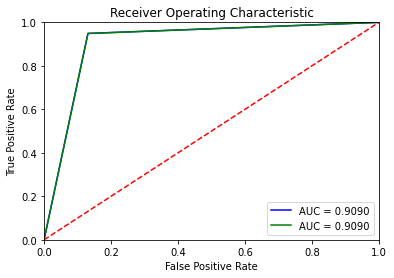

In [45]:
fpr_entropy_opt,tpr_entropy_opt,threshold_entropy_opt = roc_curve(entropy_model_fitted.predict(X_test), y_test)
roc_auc_entropy_opt = auc(fpr_entropy_opt,tpr_entropy_opt)

fpr_gini_opt,tpr_gini_opt,threshold_gini_opt = roc_curve(best_gini_model_fitted.predict(X_test), y_test)
roc_auc_gini_opt = auc(fpr_entropy_opt,tpr_entropy_opt)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_entropy_opt,tpr_entropy_opt, 'b',label = 'AUC = %0.4f' % roc_auc_entropy_opt)
plt.plot(fpr_gini_opt,tpr_gini_opt, 'g',label = 'AUC = %0.4f' % roc_auc_gini_opt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [46]:
rfc = RandomForestClassifier(n_estimators=10) 

In [47]:
rfc_model = rfc.fit(X_train, y_train)

In [49]:
print('Random Forest Classifier')
print('Recall: ' , recall_score(y_test, rfc_model.predict(X_test) ))
print('Accuracy: ' , accuracy_score(y_test, rfc_model.predict(X_test) ))
print('Precision: ' , precision_score(y_test, rfc_model.predict(X_test) ))
print('f1 score: ' , f1_score(y_test, rfc_model.predict(X_test) ))
print('roc score: ' , roc_auc_score(y_test, rfc_model.predict(X_test) ))

Random Forest Classifier
Recall:  0.89189729443395
Accuracy:  0.9077888807322956
Precision:  0.9210515451148773
f1 score:  0.9062400032497373
roc score:  0.9077776988567938


In [55]:
rfc = RandomForestClassifier() 
estimators = [3,5,10,15,20,25,30,35,40]
gridsearch_rf= GridSearchCV(rfc, param_grid = {'n_estimators': estimators}, cv =5, scoring= 'roc_auc')

In [56]:
rf_gs= gridsearch_rf.fit(X_train,y_train)

In [57]:
print(rf_gs.best_params_,rf_gs.best_score_)

{'n_estimators': 40} 0.9671592593495738


The random forest classifier is giving a higher AUC of 0.96 in comparison to the Decision Trees.
Let's test this model on the test set.

In [71]:
rfc_best= RandomForestClassifier(n_estimators=40) 
rfc_best_fitted = rfc_best.fit(X_train, y_train)
print('Random Forest Classifier- Performance')
print('Recall: ', recall_score(y_test,rfc_best_fitted.predict(X_test) ))
print('Accuracy: ' ,accuracy_score(y_test,rfc_best_fitted.predict(X_test)))
print('Precision: ',precision_score(y_test,rfc_best_fitted.predict(X_test)))
print('f1 score: ',f1_score(y_test,rfc_best_fitted.predict(X_test)))
print('roc_auc: ',roc_auc_score(y_test,rfc_best_fitted.predict(X_test)))

Random Forest Classifier- Performance
Recall:  0.8959151649625698
Accuracy:  0.9040834569306906
Precision:  0.9106692945383615
f1 score:  0.9032319822656624
roc_auc:  0.9040777094349948


The AUC of Random Forest is at par with Decision trees. Recall and Accuracy are better. While Precision is seen to be lower.

## Gradient Boosting Classifier

In [54]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb_model = gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score",accuracy_score(gb_model.predict(X_test), y_test))
    print("Precision score: ", precision_score(gb_model.predict(X_test), y_test))
    print("Recall score: ", recall_score(gb_model.predict(X_test), y_test))
    print("Roc score: ", roc_auc_score(gb_model.predict(X_test), y_test))
    
    print()

Learning rate:  0.05
Accuracy score 0.8355780610945482
Precision score:  0.9653383706635483
Recall score:  0.7662921883181797
Roc score:  0.8597783965645881

Learning rate:  0.1
Accuracy score 0.8414458144191923
Precision score:  0.9567529209518955
Recall score:  0.7773185328342089
Roc score:  0.8605975786949845

Learning rate:  0.25
Accuracy score 0.8587893950970551
Precision score:  0.9368234835537166
Recall score:  0.810213678168868
Roc score:  0.8677305692609971

Learning rate:  0.5
Accuracy score 0.8801080665378258
Precision score:  0.907319120865941
Recall score:  0.8603516087760034
Roc score:  0.8812324695064412

Learning rate:  0.75
Accuracy score 0.8932018956588613
Precision score:  0.8949756628986637
Recall score:  0.8916782012088864
Roc score:  0.8932064671695978

Learning rate:  1
Accuracy score 0.8964728560228118
Precision score:  0.890258163173518
Recall score:  0.9013296365255403
Roc score:  0.8965350843759791

Learning rate:  1.25
Accuracy score 0.8945851872936923
Preci

The model seems to be performing well in terms of roc score until a learning rate of 1. The performance is seen to have a decline after that. The recall is improving while the precision reducing which is an indicator of the model leaning towards more false positives.

Support Vector classifier could not be used due to large size of the dataset and high memory usage.

Of all the models trained above, Decision trees seem to be the best in terms of Roc as well as recall.
Let's represent a comparison of all the models visually.

In [ ]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb_model = gb.fit(X_train, y_train)
fpr_gb_best,tpr_gb_best,threshold_gb_best = roc_curve(gb_model.predict(X_test),y_test)
roc_auc_gb_best = auc(fpr_gb_best,tpr_gb_best)


In [73]:
rfc = RandomForestClassifier(n_estimators=40)
rfc_model = rfc.fit(X_train,y_train)
fpr_rfc_best,tpr_rfc_best,threshold_rfc_best = roc_curve(rfc_best_fitted.predict(X_test),y_test)
roc_auc_rfc_best = auc(fpr_rfc_best,tpr_rfc_best)

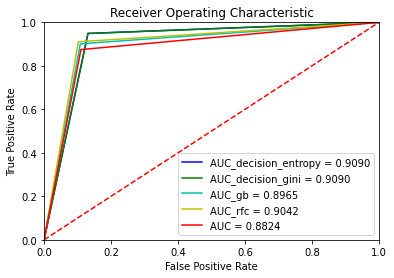

In [74]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_entropy_opt,tpr_entropy_opt, 'b',label = 'AUC_decision_entropy = %0.4f' % roc_auc_entropy_opt)
plt.plot(fpr_gini_opt,tpr_gini_opt, 'g',label = 'AUC_decision_gini = %0.4f' % roc_auc_gini_opt)
plt.plot(fpr_gb_best,tpr_gb_best, 'c',label = 'AUC_gb = %0.4f' % roc_auc_gb_best)
plt.plot(fpr_rfc_best,tpr_rfc_best, 'y',label = 'AUC_rfc = %0.4f' % roc_auc_rfc_best)
plt.plot(fpr_logreg_best,tpr_logreg_best, 'r',label = 'AUC = %0.4f' % roc_auc_logreg_best)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Observation and Conclusion:

Decision trees can be seen outperforming their counterparts. The True positive rate is higher and False negative rate at par with the remaining models.

Hence Decision Trees can be considered for Predicting the responses of the customers based on their profiling.